<a href="https://colab.research.google.com/github/Arush0113/EEG_Pipeline-IITR/blob/main/Sequential_Modelling_SparseCat_lossMode_EEG_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [235]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [236]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
# from sklearn.model_selection import train_test_split

In [237]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [238]:
train_images, test_images = train_images/255., test_images/255.

[8]


(32, 32, 3)

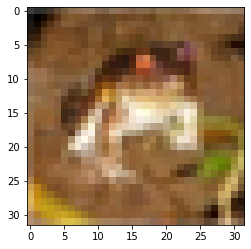

In [239]:
plt.imshow(train_images[0])
print(labels[0])
train_images[0].shape

In [162]:
train_labels[0]

array([6], dtype=uint8)

In [163]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [164]:
# import json

# with open('/content/gdrive/MyDrive/cifar100_fine_labels.json', 'r') as fine_labels:
#     cifar100_fine_labels = json.load(fine_labels)

In [165]:
# len(cifar10_fine_labels)

# Modelling

In [195]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Input, Flatten

In [196]:
# num_classes = 10

# train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
# test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)
# train_labels[0]

In [197]:
def get_generator(features, labels, batch_size = 1):
  for n in range(features.shape[0]//batch_size):
    yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [198]:
def get_cyclic_generator(features, labels, batch_size = 1):
  while True:
    for n in range(features.shape[0]//batch_size):
      yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
    permuted = np.random.permutation(len(features))
    features = features[permuted]
    labels = labels[permuted]

In [199]:
train_batch_size = 10
train_generator = get_generator(train_images, train_labels, batch_size = train_batch_size)
train_generator_cyclic = get_cyclic_generator(train_images, train_labels, batch_size = train_batch_size)

In [200]:
images, labels = next(train_generator)

[[8]
 [3]
 [9]
 [6]
 [6]
 [1]
 [8]
 [5]
 [2]
 [9]]


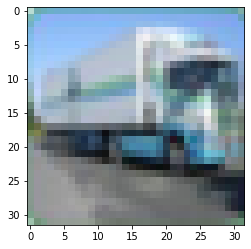

In [212]:
images, labels = next(train_generator)

for i in range(len(images)):
  image_unbatched = images[i,:,:,:]
  plt.imshow(image_unbatched)
print(labels)

## Data Augmentation

In [213]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [214]:
def func_monochrome(x):
  def func_bw(a):
    average_pixel = np.mean(a)
    return [average_pixel, average_pixel, average_pixel]
  x = np.apply_along_axis(func_bw, -1, x)
  return x

In [191]:
data_generator = ImageDataGenerator(
    preprocessing_function = func_monochrome,
    rotation_range = 180,
    rescale = (1/255.0),
    horizontal_flip = False,
    vertical_flip = False,
)

data_generator.fit(train_images)

In [192]:
data_generator_iterable = data_generator.flow(train_images, train_labels, batch_size = 10, shuffle = False)

In [246]:
# def get_sequential_model():

#   model = tf.keras.Sequential()
#   model.add(Input((32,32,3)))
#   # model.add(Conv2D(16, (16, 16), padding='same', activation='relu'))
#   # model.add(MaxPooling2D((8,8)))
#   model.add(Conv2D(16, (16, 16), padding='same', activation='relu'))
#   model.add(MaxPool2D((8,8)))
#   model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
#   model.add(MaxPool2D((4,4)))
#   model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
#   model.add(Flatten())
#   model.add(Dense(200, activation='relu'))
#   model.add(Dense(100, activation='relu'))
#   model.add(Dense(100, activation='softmax'))

#   return model

def get_sequential_model():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPool2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPool2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10))

  return model


# def get_sequential_model():

#   model = tf.keras.Sequential()
#   model.add(Input((32, 32, 3)))
#   model.add(Conv2D(8, (8, 8), padding='same', activation='relu',))
#   model.add(MaxPool2D((4,4)))
#   # model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
#   # model.add(MaxPool2D((2,2)))
#   model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
#   model.add(Flatten())
#   # model.add(Dense(400, activation='relu'))
#   model.add(Dense(200, activation='relu'))
#   model.add(Dense(100, activation='softmax'))

#   return model;

In [247]:
model = get_sequential_model()
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc', 'val_acc'])
# model.summary()

In [248]:
# optimizer = tf.keras.optimizers.Adam(1e-3)
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_16 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)              

In [249]:
np.squeeze(train_labels[0])
train_labels = np.squeeze(train_labels)

In [250]:
train_steps_per_epoch = data_generator_iterable.n // data_generator_iterable.batch_size
# val_steps = val_generator.n // val_generator.batch_size
# print('Train Steps per Epoch: ', train_steps_per_epoch, '\n', 'Validation Steps', val_steps)

In [251]:
train_steps_per_epoch = len(train_images) // train_batch_size
print(train_steps_per_epoch)

# history = model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch)
history = model.fit(train_images, train_labels, epochs = 10)

5000
Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.5499 - accuracy: 0.4343
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1762 - accuracy: 0.5826
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0191 - accuracy: 0.6441
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9143 - accuracy: 0.6756
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8393 - accuracy: 0.7059
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7811 - accuracy: 0.7263
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7331 - accuracy: 0.7428
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6869 - accuracy: 0.7581
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6520 - accuracy: 0.7706
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 

In [252]:
y_0 = model.predict(images[0][np.newaxis, ...])
print(np.squeeze(y_0, axis = 0))
# print('\n')
print(labels[0])

[  12.938297   82.633064 -343.42026   157.25319  -722.0558    -34.05294
 -523.8552    229.10338  -274.97726  -725.1702  ]
[8]
